In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cleaned_muse_with_english_lyrics_only.csv")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_lyrics"], df["final_emotion"], 
    test_size=0.2, random_state=42, stratify=df["final_emotion"]
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,3), 
    min_df=2, 
    max_df=0.8,
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
model = LinearSVC(class_weight='balanced')

In [ ]:
model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       anger       0.15      0.19      0.17       569
        calm       0.16      0.18      0.17      1034
  excitement       0.20      0.18      0.19      1247
        fear       0.07      0.10      0.08       294
         joy       0.24      0.22      0.23      1451
     neutral       0.15      0.16      0.15       952
  reflective       0.19      0.16      0.17      1301
    romantic       0.17      0.23      0.20       734
     sadness       0.24      0.20      0.22      1517

    accuracy                           0.19      9099
   macro avg       0.17      0.18      0.17      9099
weighted avg       0.19      0.19      0.19      9099



              precision    recall  f1-score   support

       anger       0.15      0.19      0.17       569
        calm       0.16      0.18      0.17      1034
  excitement       0.20      0.18      0.19      1247
        fear       0.07      0.10      0.08       294
         joy       0.24      0.22      0.23      1451
     neutral       0.15      0.16      0.15       952
  reflective       0.19      0.16      0.17      1301
    romantic       0.17      0.23      0.20       734
     sadness       0.24      0.20      0.22      1517

    accuracy                           0.19      9099
   macro avg       0.17      0.18      0.17      9099
weighted avg       0.19      0.19      0.19      9099

Confusion Matrix:
 [[108  34  86  31  67  91  62  36  54]
 [ 42 181  98  45 151  83 131 146 157]
 [128 130 219  46 203 133 135 128 125]
 [ 28  28  36  30  26  42  53  21  30]
 [ 76 185 169  52 318 150 142 179 180]
 [102  92 113  57 125 151 103  79 130]
 [ 89 170 155  50 172 151 207  99 208]
 [ 

<Figure size 1200x800 with 0 Axes>

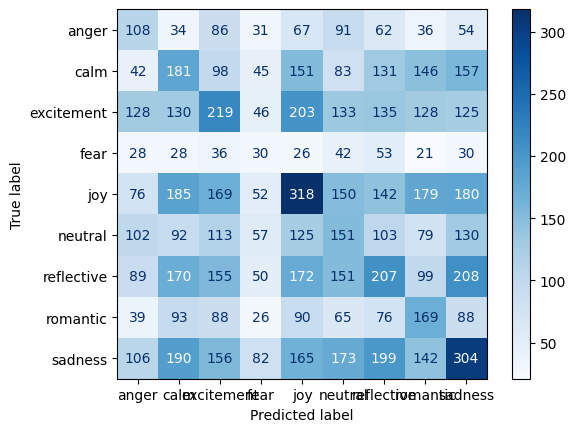

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(12, 8))  # adjust width x height in inches

# Train model
model.fit(X_train_tfidf, y_train)

# Predict
preds = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(preds_classes)

In [ ]:
tfidf.get_feature_names_out()[:1000]


array(['000', '10', '100', '11', '12', '15', '16', '17', '18', '20',
       '2000', '21', '24', '25', '2x', '30', '3x', '40', '45', '50',
       'aaa', 'aaah', 'aah', 'aah aah', 'aah aah aah', 'abandoned',
       'ability', 'able', 'able to', 'about', 'about all', 'about her',
       'about how', 'about is', 'about it', 'about love', 'about me',
       'about my', 'about that', 'about the', 'about the way',
       'about this', 'about time', 'about to', 'about us', 'about what',
       'about you', 'about you and', 'about you baby', 'about your',
       'above', 'above and', 'above me', 'above my', 'above the',
       'above you', 'absolutely', 'absurd', 'abuse', 'abused', 'abyss',
       'accept', 'accident', 'ache', 'aches', 'achieve', 'aching', 'acid',
       'across', 'across my', 'across the', 'act', 'act like',
       'act like you', 'actin', 'acting', 'acting like', 'action',
       'actions', 'acts', 'actually', 'ad', 'adam', 'add', 'addicted',
       'addicted to', 'addiction'